# Optimisation

In [1]:
import sys
sys.path.append("..")
from cavsim2d.cavity import Cavity, Cavities, OperationPoints
import numpy as np
import json
import matplotlib
import matplotlib.pyplot as plt
plt.ion()
# %matplotlib inline
import pprint
pp = pprint.PrettyPrinter(indent=4)

In [ ]:
cavs = Cavities([])
# must first save cavities
cavs.save('D:\Dropbox\CavityDesignHub\MuCol_Study\SimulationData\ConsoleTest')
cell_type = 'end-end-cell'

optimisation_config = {
    'initial_points': 5,
    'method': {
        'LHS': {'seed': 5},
        # 'Sobol Sequence': {'index': 2},
        # 'Random': {},
        # 'Uniform': {},
        },
    # 'mid-cell': [1, 2, 3, 3, 6, 5, 2],  # must enter if mid-end cell selected
    'tune_config': {
        'freqs': 801.58,
        'parameters': 'Req',
        'cell_types': cell_type,
        'processes': 4,
        'eigenmode_config': {'n_cells': 1,
                             'n_modules': 1,
                             'f_shift': 0,
                             'bc': 33,
                             'beampipes': 'both',
                            },
    },
    'wakefield_config': {'n_cells': 1, 'n_modules': 1,
                         'MROT': 2, 'MT': 4, 'NFS': 10000, 'UBT': 50, 'bunch_length': 25,
                         'DDR_SIG': 0.1, 'DDZ_SIG': 0.1,
                         'WG_M': None, 'marker': ''
                        },
    'optimisation by': 'pareto',
    'crossover_factor': 5,
    'elites_for_crossover': 2,
    'mutation_factor': 5,
    'chaos_factor': 5,
    'processes': 3,
    'no_of_generation': 2,
    'bounds': {'A': [20.0, 80.0],
               'B': [20.0, 80.0],
               'a': [10.0, 60.0],
               'b': [10., 60.0],
               'Ri': [60.0, 85.0],
               'L': [93.5, 93.5],
               'Req': [170.0, 170.0]},
    'objectives': [
        # ['equal', 'freq [MHz]', 801.58],
                      ['min', 'Epk/Eacc []'],
                      ['min', 'Bpk/Eacc [mT/MV/m]'],
                      ['min', 'ZL', [1, 2, 5]],
                      ['min', 'ZT', [1, 2, 5]],
                  ],
    'weights': [1, 1, 1, 1, 1, 1]
}
cavs.run_optimisation(optimisation_config)

Project D:\Dropbox\CavityDesignHub\MuCol_Study\SimulationData\ConsoleTest created successfully/already exists.


  0%|          | 0/2 [00:00<?, ?it/s]

# Optimisation with UQ

In [1]:
import sys
sys.path.append("..")
from cavsim2d.cavity import Cavity, Cavities, OperationPoints
import numpy as np
import json
import matplotlib
import matplotlib.pyplot as plt
plt.ion()
# %matplotlib inline
import pprint
pp = pprint.PrettyPrinter(indent=4)

Project D:\Dropbox\CavityDesignHub\MuCol_Study\SimulationData\ConsoleTest created successfully/already exists.


  0%|          | 0/2 [00:00<?, ?it/s]

Pareto: 3 optimal values, 3 objects
       key     A     B     a     b    Ri     L         Req     alpha_i  \
0  G0_C0_P  50.0  26.0  15.0  15.0  82.5  93.5  171.171871  117.480430   
1  G0_C3_P  38.0  50.0  25.0  35.0  67.5  93.5  180.274544  118.678490   
2  G0_C2_P  26.0  62.0  45.0  25.0  62.5  93.5  187.622935  109.565878   

      alpha_o  ...  E[ZT [max(2<f<5)]]  std[ZT [max(2<f<5)]]  \
0  117.480430  ...            0.946627              0.032231   
1  118.678490  ...            1.562262              0.001952   
2  109.565878  ...            7.558106              0.106795   

   E[ZT [max(2<f<5)]] + 6*std[ZT [max(2<f<5)]]  \
0                                     1.140013   
1                                     1.573975   
2                                     8.198874   

   rank_E[Epk/Eacc []] + 6*std[Epk/Eacc []]  \
0                                       2.0   
1                                       1.0   
2                                       3.0   

   rank_E[Bpk/Eacc [

D:\Dropbox\cavsim2d\notebooks\..\cavsim2d\cavity.py:597: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_ng = pd.concat([df_cross, df_mutation, df_chaos], ignore_index=True)


Pareto: 10 optimal values, 10 objects
         key     A     B          a          b         Ri     L         Req  \
0    G0_C0_P  38.0  74.0  25.000000  15.000000  82.500000  93.5  186.036971   
1    G0_C0_P  50.0  26.0  15.000000  15.000000  82.500000  93.5  171.171871   
2   G0_C4_CO  40.0  42.0  18.333333  23.333333  75.000000  93.5  178.880716   
3   G0_C0_CO  46.0  40.0  20.000000  25.000000  71.666667  93.5  174.425190   
4    G0_C3_P  38.0  50.0  25.000000  35.000000  67.500000  93.5  180.274544   
5   G0_C1_CO  42.0  30.0  20.000000  18.333333  70.000000  93.5  173.782729   
6   G0_C2_CO  40.0  38.0  18.333333  23.333333  80.000000  93.5  178.780345   
7   G0_C3_CO  46.0  44.0  23.333333  26.666667  72.500000  93.5  175.145048   
8    G0_C3_P  74.0  26.0  15.000000  45.000000  77.500000  93.5  161.079720   
9    G0_C2_P  26.0  50.0  35.000000  55.000000  62.500000  93.5  187.699192   
10   G0_C2_P  26.0  62.0  45.000000  25.000000  62.500000  93.5  187.622935   

       alpha_

D:\Dropbox\cavsim2d\notebooks\..\cavsim2d\cavity.py:597: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_ng = pd.concat([df_cross, df_mutation, df_chaos], ignore_index=True)


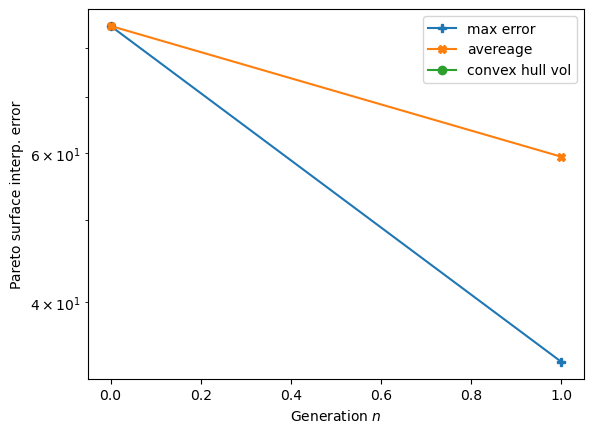

In [2]:
cavs = Cavities([])
# must first save cavities
cavs.save('D:\Dropbox\CavityDesignHub\MuCol_Study\SimulationData\ConsoleTest')
cell_type = 'end-end-cell'

optimisation_config = {
    'initial_points': 5,
    'method': {
        'LHS': {'seed': None},
        # 'Sobol Sequence': {'index': 2},
        # 'Random': {},
        # 'Uniform': {},
        },
    # 'mid-cell': [1, 2, 3, 3, 6, 5, 2],  # must enter if mid-end cell selected
    'tune_config': {
        'freqs': 801.58,
        'parameters': 'Req',
        'cell_types': cell_type,
        'processes': 4,
        'eigenmode_config': {'n_cells': 1,
                             'n_modules': 1,
                             'f_shift': 0,
                             'bc': 33,
                             'beampipes': 'both',
                             'uq_config': {
                                 'variables': ['A'],
                                 'objectives': ["Epk/Eacc []", "Bpk/Eacc [mT/MV/m]", "R/Q [Ohm]", "G [Ohm]"],
                                 'delta': [0.05],
                                 'processes': 4,
                                 'distribution': 'gaussian',
                                 'method': ['Stroud3'], 
                                 'cell_type': 'mid-cell',
                                 'cell complexity': 'simplecell'
                                }
                            },
    },
    'wakefield_config': {'n_cells': 1, 'n_modules': 1,
                         'MROT': 2, 'MT': 4, 'NFS': 10000, 'UBT': 50, 'bunch_length': 25,
                         'DDR_SIG': 0.1, 'DDZ_SIG': 0.1,
                         'WG_M': None, 'marker': '',
                        'uq_config': {
                            'variables': ['A'],
                            'objectives': [["ZL", [1, 2, 5]], ["ZT", [2, 3, 4]]],
                            'delta': [0.05],
                            'processes': 4,
                            'distribution': 'gaussian',
                            'method': ['Stroud3'],
                            'cell_type': 'mid-cell',
                            'cell complexity': 'simplecell'
                            }
                        },
    'optimisation by': 'pareto',
    'crossover_factor': 5,
    'elites_for_crossover': 2,
    'mutation_factor': 5,
    'chaos_factor': 5,
    'processes': 3,
    'no_of_generation': 2,
    'bounds': {'A': [20.0, 80.0],
               'B': [20.0, 80.0],
               'a': [10.0, 60.0],
               'b': [10., 60.0],
               'Ri': [60.0, 85.0],
               'L': [93.5, 93.5],
               'Req': [170.0, 170.0]},
    'objectives': [
        # ['equal', 'freq [MHz]', 801.58],
                      ['min', 'Epk/Eacc []'],
                      ['min', 'Bpk/Eacc [mT/MV/m]'],
                      ['min', 'ZL', [1, 2, 5]],
                      ['min', 'ZT', [1, 2, 5]],
                  ],
    'weights': [1, 1, 1, 1, 1, 1]
}
cavs.run_optimisation(optimisation_config)